# Meta Phenotypes of Arabidopsis Point Clouds

## By: Elyse Vischulis and Kenia Segura Abá

### This notebook uses Meshlab (https://www.meshlab.net/#description) to measure traits such as plant height, branch length, plant surface area, and surface area between branches. Trait protocol modified from https://www.protocols.io/view/phenotyping-3d-coral-models-in-meshlab-bgbpjsmn.html. Open3D Visualization and Segmentation modified from http://www.open3d.org/docs/release/tutorial/geometry/pointcloud.html#. 




#### Step 1: Download Meshlab

Open point cloud using File > Import mesh > select file and Open

#### Step 2: Generate Scale Factor for a model using scaling markers/objects. 

This process can be completed using any object of known size that is built into the model. It is helpful to take replicate measures for different scaling objects. For this notebook, we used the black pot as our scaling object. The length of the pot is estimated to be 4.25 inches, or 10.795 cm. 

Measure 3 seperate radii on the markers. In our case, we measured each side of the top of the black pot. 
    a) Select the Measuring Tool and click once to set the start point for a measure then move the mouse to make the measurement and click again. The measurment will appear in the top lefthand Corner of teh working space. 
    b) Press ESC to make another measurement. You can also press ESC in the middle of a measurement to rotate/zoom teh model. 

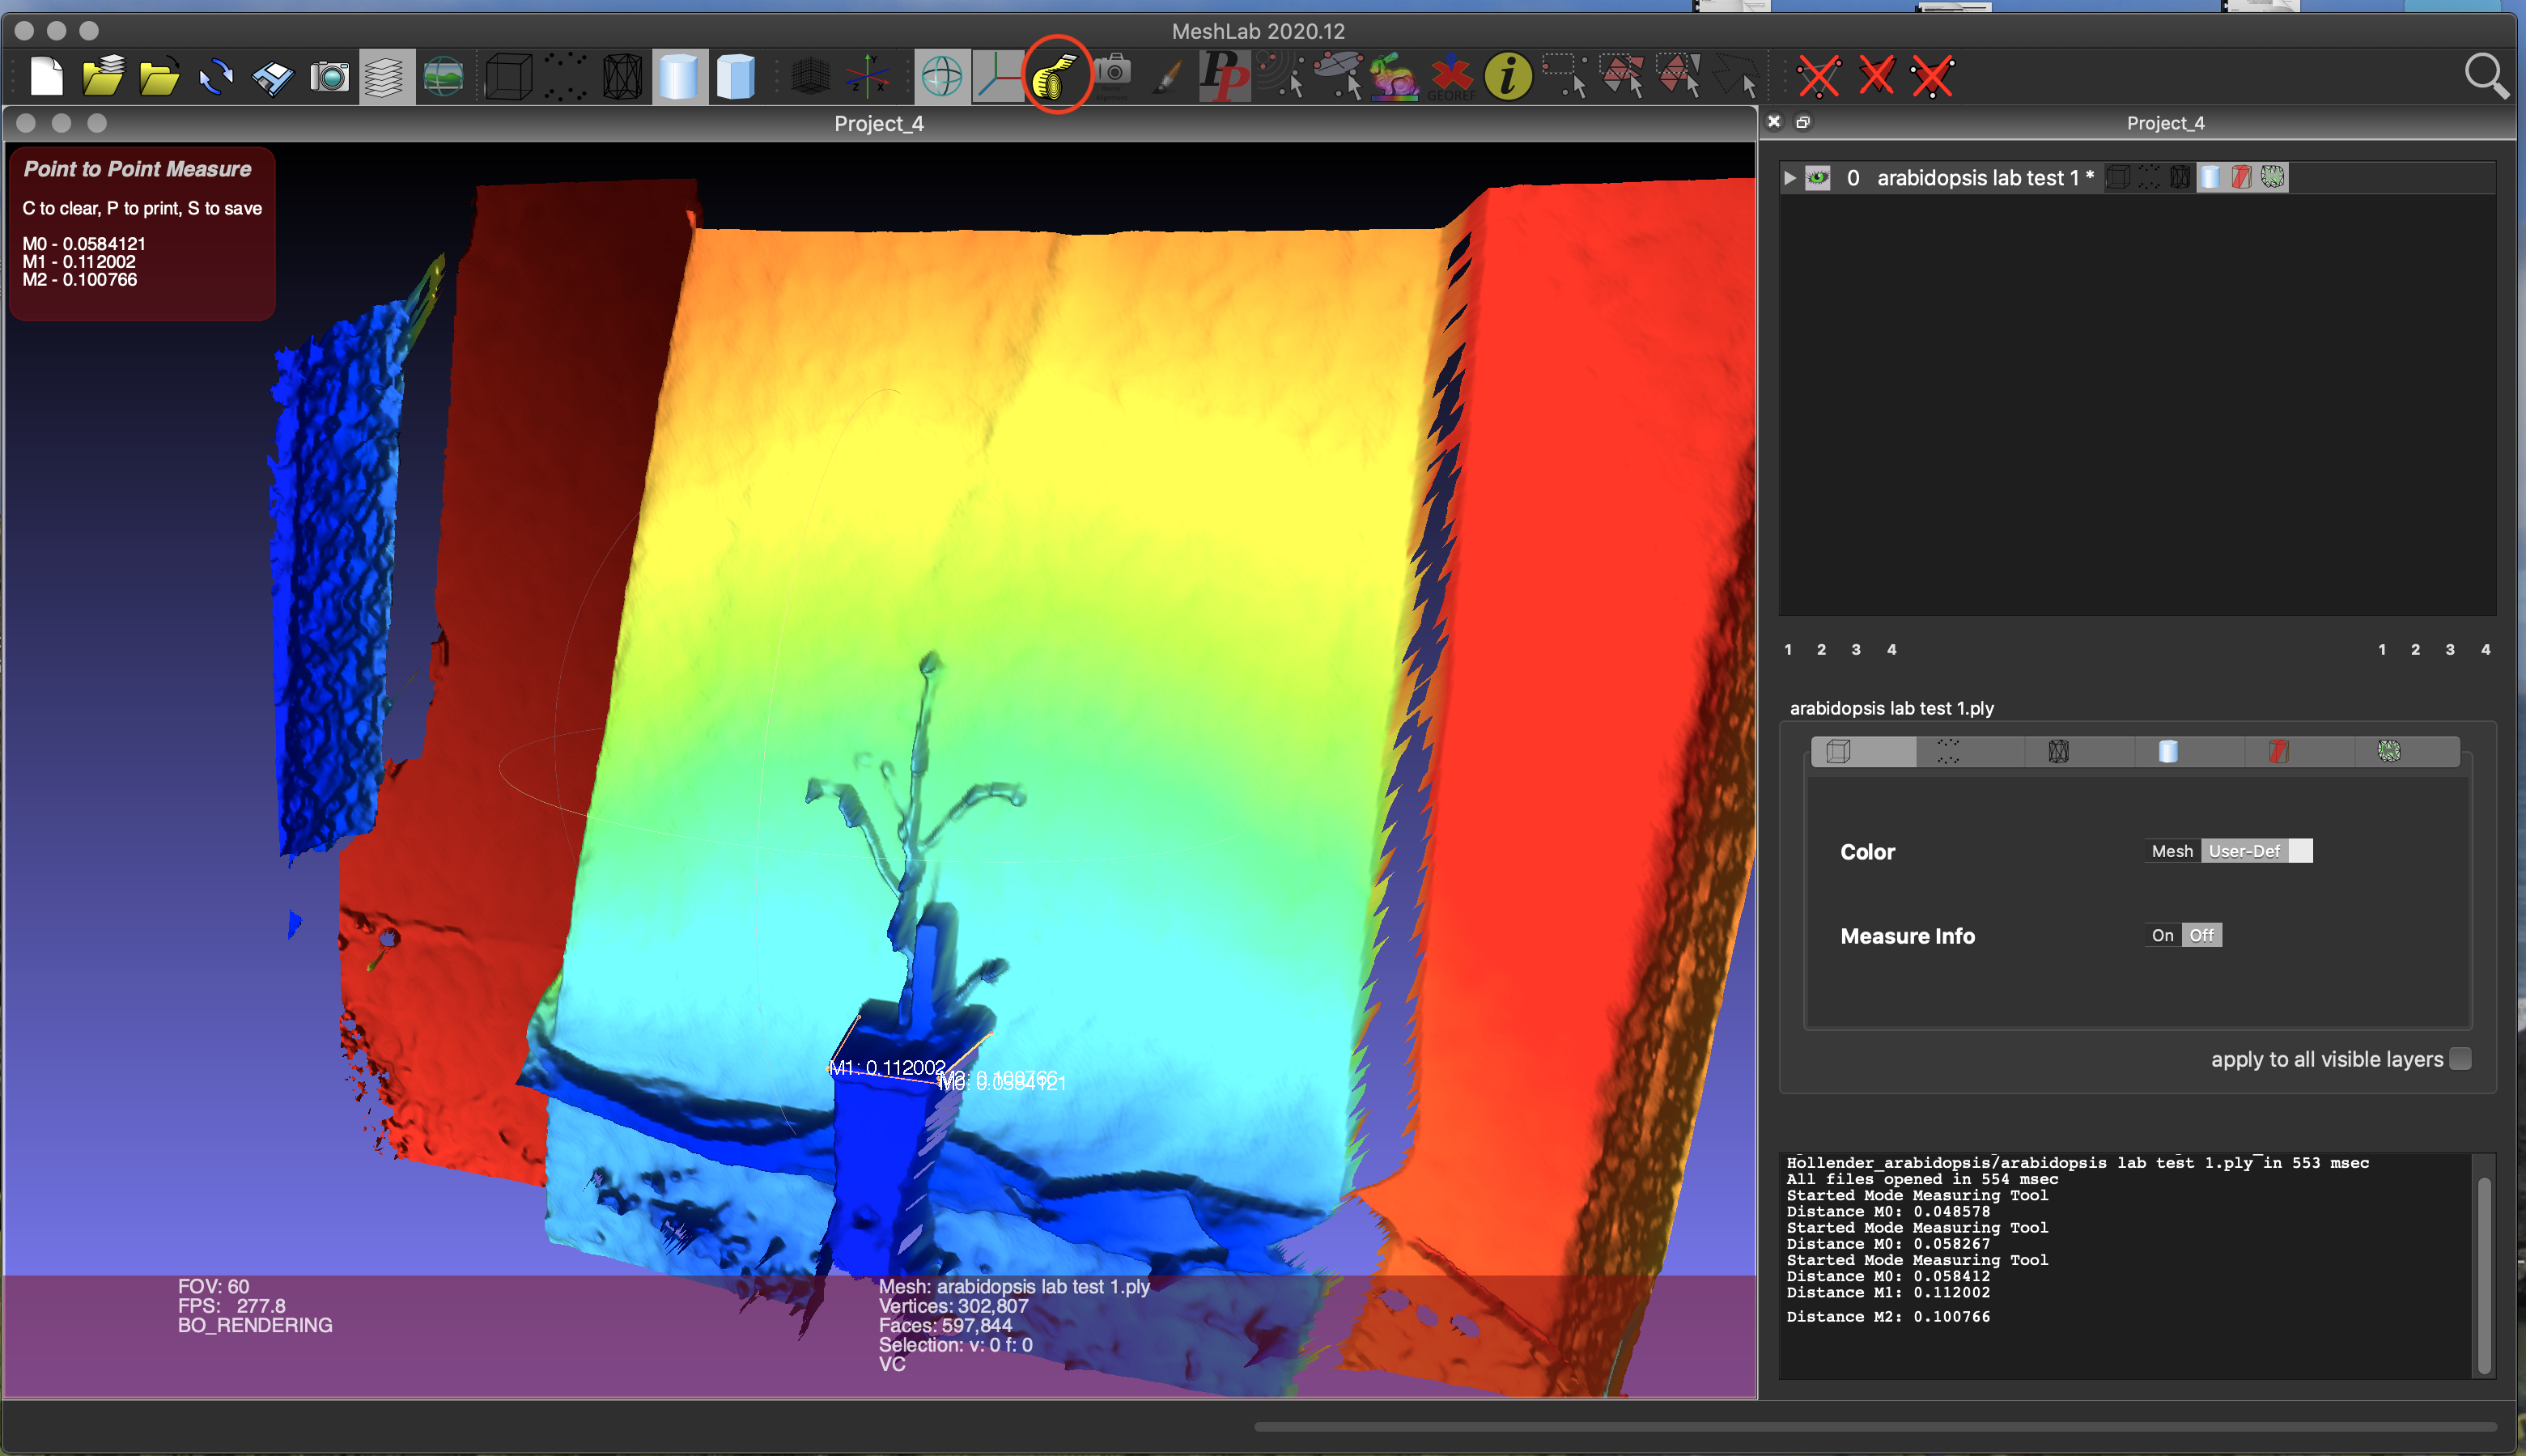

In [1]:
from IPython import display
display.Image("Measure.png")

Calculate a scale factor from your measurements of the scaling object. In this case, because all of the scaling objects have identical dimensions you can average these lengths before creating a scale factor. 

Use the following equation: 

10.795cm/(average of radii) = scale factor

In general, you can determine the scale factor with: 
(actual measure of scaling object/ (average of replicate 3D measures of scaling object))= scale factor

#### Step 3: Apply scale factor to the model

a) Filters > Normals, Curvatures, and Orientation > Transform: Scale, Normalize 
b) Enter the scale factor into X Axis box, making sure 'Uniform Scaling', 'Freeze Matrix', and 'Apply to All Visible Layers' are all checked.
c) Click "Apply" to scale your model. 

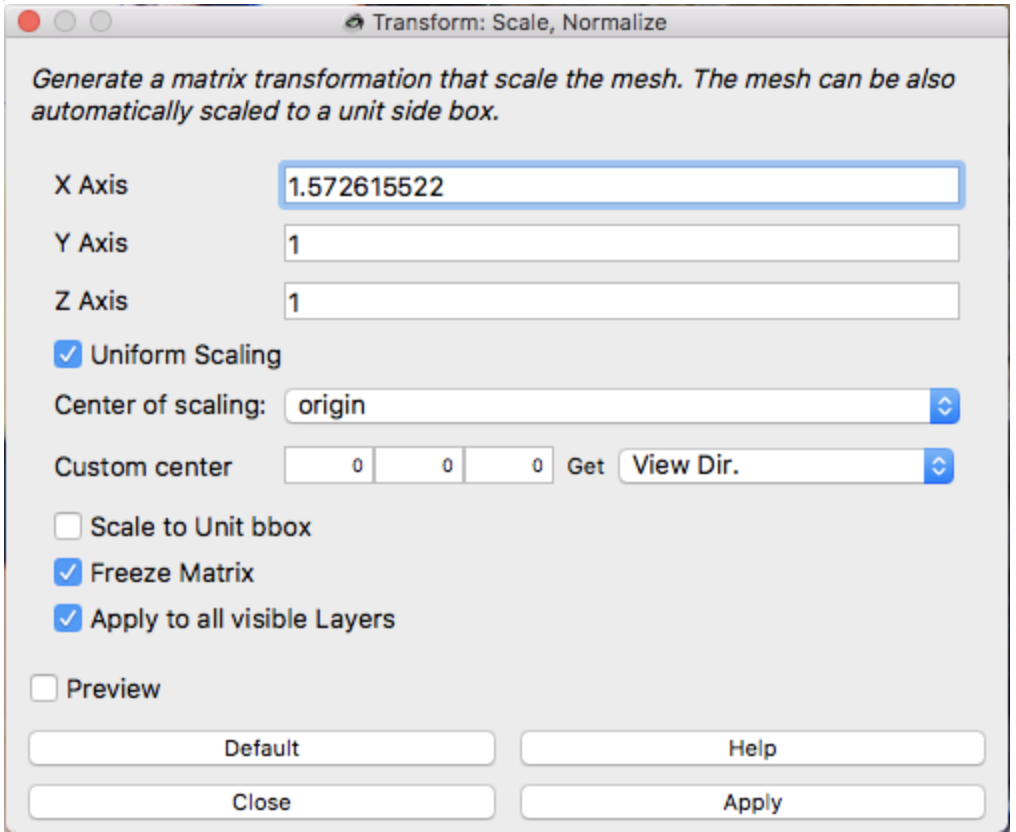

In [2]:
display.Image("scalefactor.png")

#### Step 4: Remove background from model 

You can crop out anything besides the Arabidopsis plant, including the scaling object. Remove all non-plant background by highlighting the area to be removed with the Select Vertices tool (square selection tool along the top toolbar) then deleting the selected area from the mesh. 

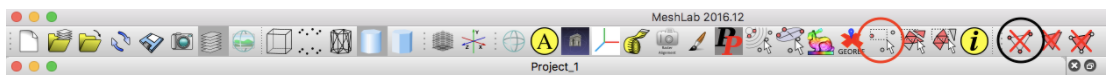

In [3]:
display.Image("toolbar.png")

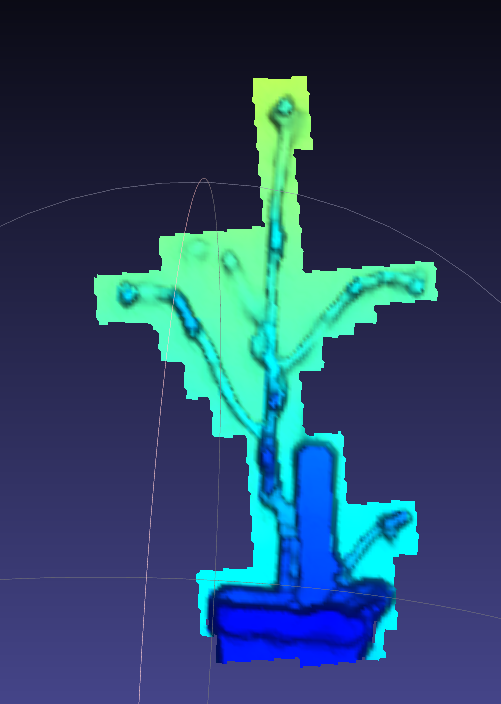

In [5]:
display.Image("manualcrop.png")

Export cropped image using File > Export Mesh As > 

Remember to rename your edited file so that it does not overwrite the original. Press ok until saved. 

#### Step 5: Further remove background using Open3D


In [7]:
import open3d as o3d
import numpy as np

Visualize point cloud: 

In [8]:
print("Load a ply point cloud, print it, and render it")
pcd = o3d.io.read_point_cloud("Hollender_arabidopsis/arabidopsis_lab_test1_edited.ply")
print(pcd)
print(np.asarray(pcd.points))
o3d.visualization.draw_geometries([pcd],
                                  zoom=0.3412,
                                  front=[0.4257, -0.2125, -0.8795],
                                  lookat=[2.6172, 2.0475, 1.532],
                                  up=[-0.0694, -0.9768, 0.2024])

Load a ply point cloud, print it, and render it
PointCloud with 8932 points.
[[ -1.37397075  15.83164215 -79.59555054]
 [ -1.19994664  15.83164215 -79.59555054]
 [ -1.02592242  15.83164215 -79.53723907]
 ...
 [  2.73336363 -29.75357437 -59.39052582]
 [  2.7260747  -29.81188583 -59.24474335]
 [  2.72425246 -29.91393089 -59.21558762]]


Plane Segmentation with Open3D: 

In [ ]:
pcd = o3d.io.read_point_cloud("Hollender_arabidopsis/arabidopsis_lab_test1_edited.ply")
plane_model, inliers = pcd.segment_plane(distance_threshold=0.01,
                                         ransac_n=3,
                                         num_iterations=1000)
[a, b, c, d] = plane_model
print(f"Plane equation: {a:.2f}x + {b:.2f}y + {c:.2f}z + {d:.2f} = 0")

inlier_cloud = pcd.select_by_index(inliers)
inlier_cloud.paint_uniform_color([1.0, 0, 0])
outlier_cloud = pcd.select_by_index(inliers, invert=True)
o3d.visualization.draw_geometries([inlier_cloud, outlier_cloud],
                                  zoom=0.8,
                                  front=[-0.4999, -0.1659, -0.8499],
                                  lookat=[2.1813, 2.0619, 2.0999],
                                  up=[0.1204, -0.9852, 0.1215])

#### Step 6: Measure surface area of the model

Import modified model after segmentation. First fill in holes in the model to approximate missing surface area. 

a) Filters > Remeshing, Simplification, and Reconstruction > Close Holes
b) Set up the "Max size to be closed" to increasingly larger sizes in increments of 50 until the hole(s) are closed. 
c) Uncheck all the boxes below "Max size to be closed" and click apply

Be careful here, setting the value too high can add surface area to the mesh that is not necessarily part of the plant.

Measure the mesh surface area using teh Compute Geometric measure Filter.

a) Filters > Quality Measure and Computations > Compute Geometric Measures
b) The output will be located in the software output panel on the bottom right of the MeshLab window.  You can scroll through the output to find the surface area measurement in cm2 . 

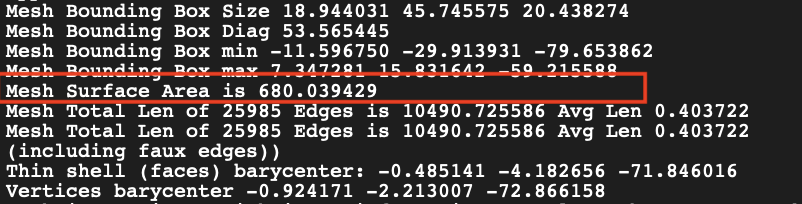

In [10]:
display.Image("meshsa.png")

#### Step 7: Determine volume of the plant

In order to determine the volume of the plant, we need to fill in holes to close th emesh and make it "tight". Usually this means the bottom of the mesh where the plant meets the pot. If the mesh is not "tight", the software output box will tell you in the lower right.

To close holes:

a) Filters > Remeshing, Simplification, and Reconstruction > Close Holes
b) Set "Max size to be closed" to be large enough to encompass the hole (usually >3000) and uncheck all boxes below
c) Apply the Close Holes filter

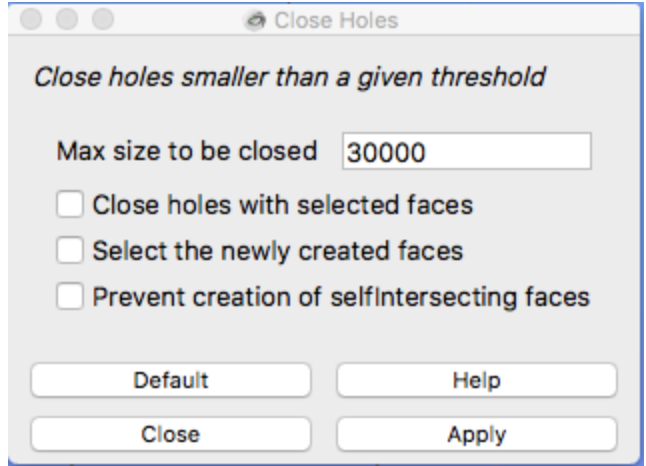

In [11]:
display.Image("closehole.png")

If a non-manifold edges/vertices error pops up you must select then delete manifold edges/vertices.

To do this:
a) Filters > Cleaning and Repair > Select non Manifold edges or Select non Manifold vertices
b) Use Delete Selected Area tool to remove the selected edges/vertices

#### Step 8: Measure volume of closed mesh

a) Filters > Quality Measure and Computations > Compute Geometric Measures
b) Look at software output on bottom right panel, scroll through to find the volume measurement in cm3


#### Step 9: Measure linear extension of branches

a) For the main axial branch, measure from the tip to the base using the newly created base from Step 7 as the endpoint.
b) For remaining branches, measure from the tip to the point where the middle of the secondary branch joins with the main branch.


#### Step 10: Determine volume of intersitial space between branches by finding the volume of teh model's convex hull.

Apply a convex hull over the coral model to create a new mesh overlayed over the most extreme points of the model.
  
a) Filters > Remeshing, Simplification, and Reconstruction > Convex Hull 
b) Make sure to check "Re-orient all faces coherently", then click apply.





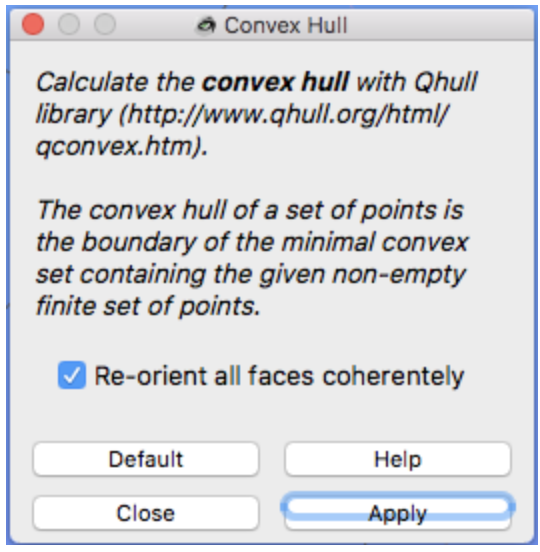

In [12]:
display.Image("convexhull.png")

Measure the volume of convex hull

a) Filters > Quality Measure and Computations > Compute Geometric Measures
b) Scroll through the software output box to find volume (and surface area) of the convex hull. These values will not indicate that they are associated with the convex hulll so be careful not to record the measurements produced earlier.

Note: A negative volume simply means the faces of the convex hull are oriented inward; this will not change the size of the convex hull.  If you re-oriented all faces coherently when applying the convex hull, you can take the absolute value of the volume given in the software output box.  

Calculate the volume of interstitial space by subtracting the volume of the coral from the volume of the convex hull. 